In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

81.50288372352955 67.66860899106948
67.94079136657399 118.90284567223
-34.75547616258725 50.85889489441661
89.41489911390468 -84.45432292069857
34.59289977538094 98.16635968594704
-39.9523246899861 75.93037692339277
19.611899269955785 139.2438554394696
-15.176903564236767 28.024069766990124
-26.336205386737127 17.408516864852373
-49.15162608082024 -159.3860986384654
-65.29002765483395 161.4290108598152
48.74807701009766 146.94309580678998
-46.954103456043825 -101.4454203202604
-51.52485523595321 78.31149822330786
-27.31919779798517 64.95769979673588
-45.39191337718267 -21.512829318361895
-9.59525501907315 33.25712009801478
58.37016725527968 125.91635799385142
41.210356222241074 2.9744760096912444
11.355194596035716 159.604592117884
-70.82004452616147 160.50578062844113
39.082106811222644 124.87044003248997
-8.652105344776473 174.83673584800124
-72.04479193709994 -45.866131304410374
-19.938146676040475 137.27536350327318
16.137460002504127 77.05560825809334
-4.623617430682131 -90.058989

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

594

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | amderma
City not found. Skipping...
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | xining
Processing Record 6 of Set 1 | mahebourg
Processing Record 7 of Set 1 | naze
Processing Record 8 of Set 1 | lusaka
Processing Record 9 of Set 1 | bethanien
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | vostok
Processing Record 13 of Set 1 | castro
Processing Record 14 of Set 1 | arraial do cabo
Processing Record 15 of Set 1 | chitipa
Processing Record 16 of Set 1 | lebedinyy
Processing Record 17 of Set 1 | malgrat de mar
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | dandong
Processing Record 20 of Set 1 | lolua
City not found. Skipping...
Processing Record 21 of Set 1 | ushuaia
Processin

Processing Record 39 of Set 4 | ribeira grande
Processing Record 40 of Set 4 | kaseda
Processing Record 41 of Set 4 | comodoro rivadavia
Processing Record 42 of Set 4 | sobolevo
Processing Record 43 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 44 of Set 4 | katobu
Processing Record 45 of Set 4 | biswan
Processing Record 46 of Set 4 | buckeye
Processing Record 47 of Set 4 | madang
Processing Record 48 of Set 4 | boa vista
Processing Record 49 of Set 4 | belmonte
Processing Record 50 of Set 4 | palana
Processing Record 1 of Set 5 | avera
Processing Record 2 of Set 5 | san policarpo
Processing Record 3 of Set 5 | paysandu
Processing Record 4 of Set 5 | ambulu
Processing Record 5 of Set 5 | tautira
Processing Record 6 of Set 5 | gemena
Processing Record 7 of Set 5 | gull lake
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | chimore
Processing Record 10 of Set 5 | bengkulu
Processing Record 11 of Set 5 | kargasok
Processing Record 12 of

Processing Record 27 of Set 8 | miranda
Processing Record 28 of Set 8 | vila franca do campo
Processing Record 29 of Set 8 | portland
Processing Record 30 of Set 8 | mareeba
Processing Record 31 of Set 8 | ubatuba
Processing Record 32 of Set 8 | marly
Processing Record 33 of Set 8 | husavik
Processing Record 34 of Set 8 | kahului
Processing Record 35 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 8 | plainview
Processing Record 37 of Set 8 | gamba
Processing Record 38 of Set 8 | dongsheng
Processing Record 39 of Set 8 | provideniya
Processing Record 40 of Set 8 | tidore
City not found. Skipping...
Processing Record 41 of Set 8 | nacala
Processing Record 42 of Set 8 | bima
Processing Record 43 of Set 8 | olafsvik
Processing Record 44 of Set 8 | jiayuguan
Processing Record 45 of Set 8 | makakilo city
Processing Record 46 of Set 8 | sundumbili
Processing Record 47 of Set 8 | angoche
Processing Record 48 of Set 8 | thinadhoo
Processing Record 49 of Set 8 | rob

Processing Record 15 of Set 12 | bokoro
Processing Record 16 of Set 12 | bukachacha
Processing Record 17 of Set 12 | lugovoy
Processing Record 18 of Set 12 | konevo
Processing Record 19 of Set 12 | arlit
Processing Record 20 of Set 12 | zalesovo
Processing Record 21 of Set 12 | sambava
Processing Record 22 of Set 12 | toyooka
Processing Record 23 of Set 12 | tahe
Processing Record 24 of Set 12 | halifax
Processing Record 25 of Set 12 | presidencia roque saenz pena
Processing Record 26 of Set 12 | barranca
Processing Record 27 of Set 12 | coahuayana
Processing Record 28 of Set 12 | greytown
Processing Record 29 of Set 12 | pisco
Processing Record 30 of Set 12 | semnan
Processing Record 31 of Set 12 | asayita
City not found. Skipping...
Processing Record 32 of Set 12 | pevek
Processing Record 33 of Set 12 | deputatskiy
Processing Record 34 of Set 12 | tabiauea
City not found. Skipping...
Processing Record 35 of Set 12 | rodopolis
Processing Record 36 of Set 12 | sola
Processing Record 37

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Zhigansk,66.7697,123.3711,-15.84,98,100,22.03,RU,2022-12-27 01:27:00
1,Qaanaaq,77.4840,-69.3632,-11.67,97,100,3.22,GL,2022-12-27 01:27:00
2,Xining,36.6167,101.7667,12.18,61,47,1.52,CN,2022-12-27 01:27:00
3,Mahebourg,-20.4081,57.7000,77.29,78,40,11.50,MU,2022-12-27 01:27:01
4,Naze,28.3667,129.4833,56.32,62,35,12.19,JP,2022-12-27 01:27:01
5,Lusaka,-15.4067,28.2871,65.14,74,97,5.30,ZM,2022-12-27 01:27:01
6,Bethanien,-26.5020,17.1583,70.56,34,0,4.68,NA,2022-12-27 01:27:02
7,Mataura,-46.1927,168.8643,68.49,56,93,3.06,NZ,2022-12-27 01:27:03
8,Bluff,-46.6000,168.3333,56.98,74,68,13.87,NZ,2022-12-27 01:27:03
9,Vostok,46.4856,135.8833,6.51,93,74,0.81,RU,2022-12-27 01:27:04


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2022-12-27 01:27:00,66.7697,123.3711,-15.84,98,100,22.03
1,Qaanaaq,GL,2022-12-27 01:27:00,77.4840,-69.3632,-11.67,97,100,3.22
2,Xining,CN,2022-12-27 01:27:00,36.6167,101.7667,12.18,61,47,1.52
3,Mahebourg,MU,2022-12-27 01:27:01,-20.4081,57.7000,77.29,78,40,11.50
4,Naze,JP,2022-12-27 01:27:01,28.3667,129.4833,56.32,62,35,12.19
...,...,...,...,...,...,...,...,...,...
543,Jieshi,CN,2022-12-27 01:41:45,22.8134,115.8257,59.92,69,1,19.93
544,Valleyview,CA,2022-12-27 01:41:46,55.0667,-117.2859,3.24,85,100,12.66
545,Montague,US,2022-12-27 01:41:46,42.5356,-72.5351,29.17,72,100,2.62
546,Tambacounda,SN,2022-12-27 01:41:46,13.7539,-13.7586,74.93,20,50,6.08


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

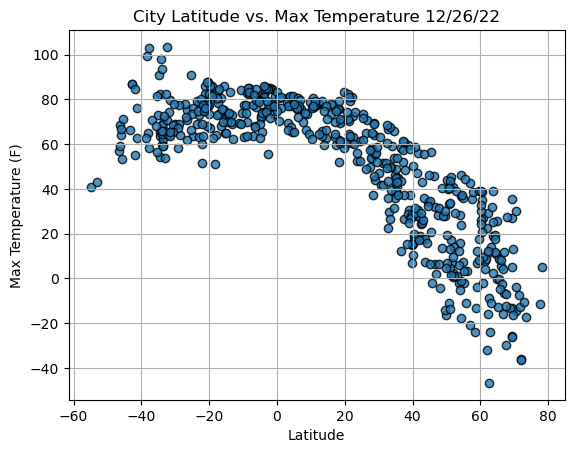

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

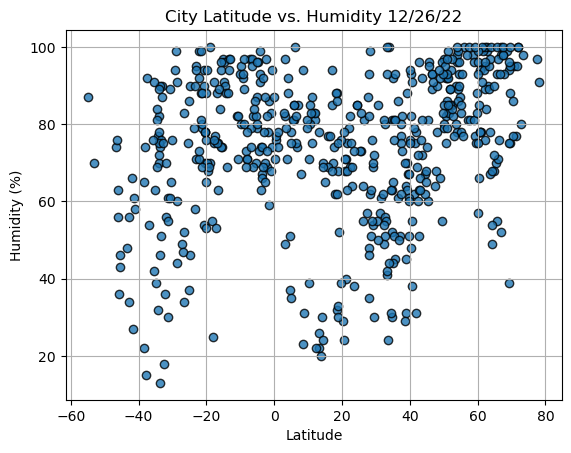

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

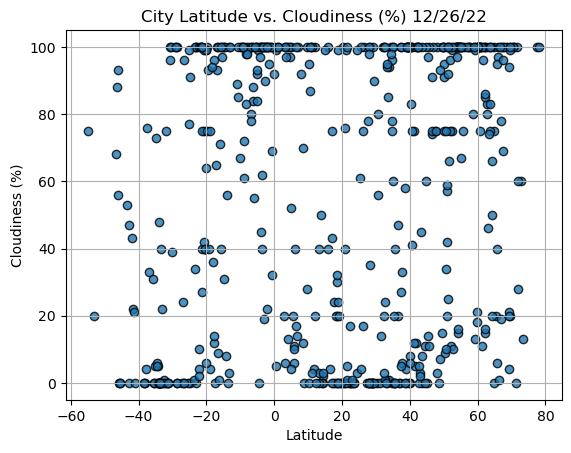

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


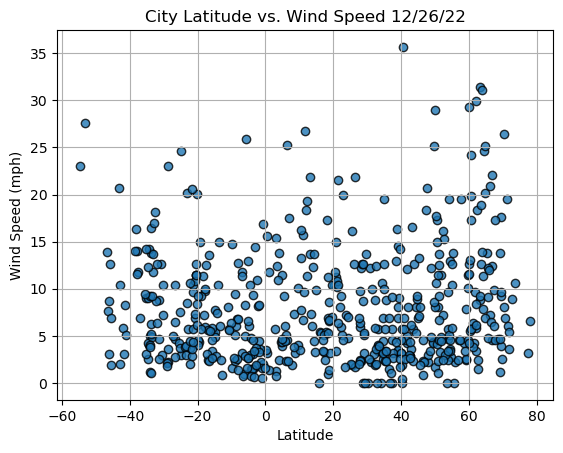

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [33]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [34]:
index13 = city_data_df.loc[13]
index13

City                    Lebedinyy
Country                        RU
Date          2022-12-27 01:27:06
Lat                       58.5167
Lng                      125.5167
Max Temp                   -24.21
Humidity                       98
Cloudiness                     80
Wind Speed                   4.23
Name: 13, dtype: object

In [35]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
543     True
544     True
545     True
546     True
547     True
Name: Lat, Length: 548, dtype: bool

In [36]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Zhigansk,RU,2022-12-27 01:27:00,66.7697,123.3711,-15.84,98,100,22.03
1,Qaanaaq,GL,2022-12-27 01:27:00,77.4840,-69.3632,-11.67,97,100,3.22
2,Xining,CN,2022-12-27 01:27:00,36.6167,101.7667,12.18,61,47,1.52
4,Naze,JP,2022-12-27 01:27:01,28.3667,129.4833,56.32,62,35,12.19
9,Vostok,RU,2022-12-27 01:27:04,46.4856,135.8833,6.51,93,74,0.81


In [37]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

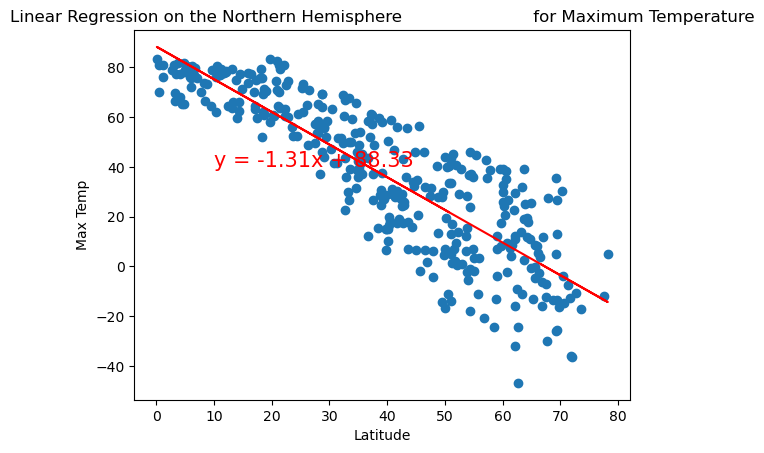

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

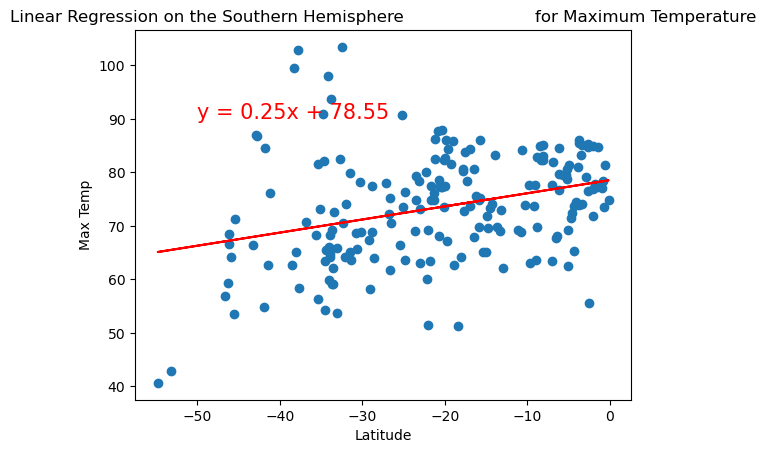

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

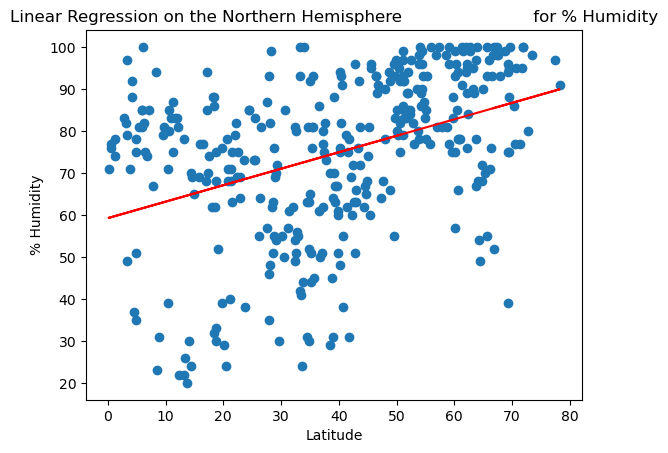

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

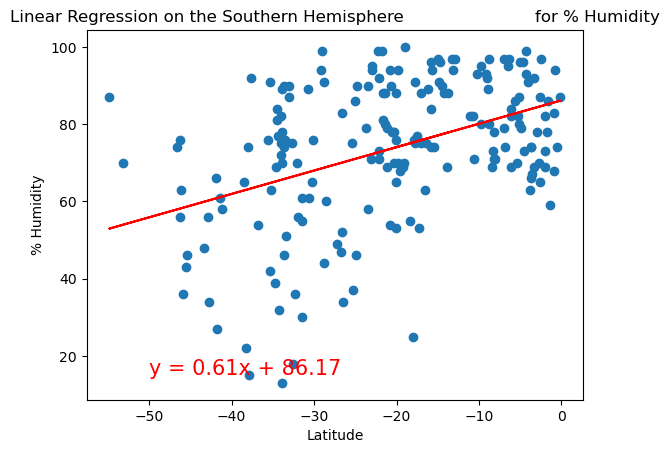

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

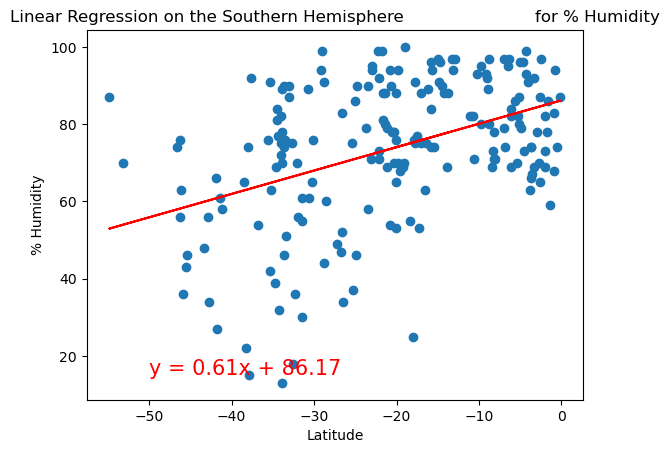

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

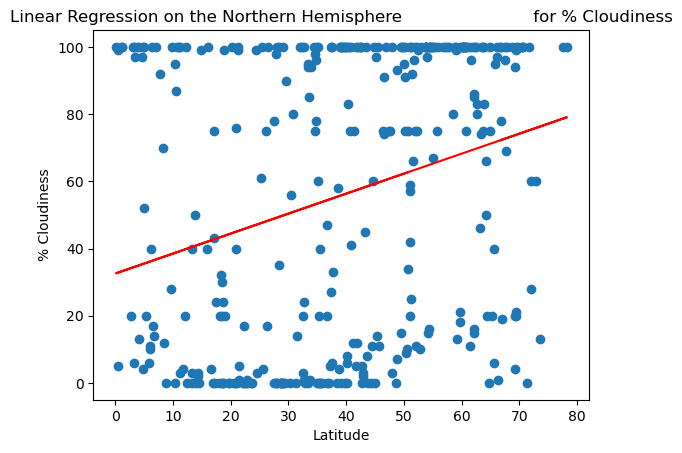

In [43]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

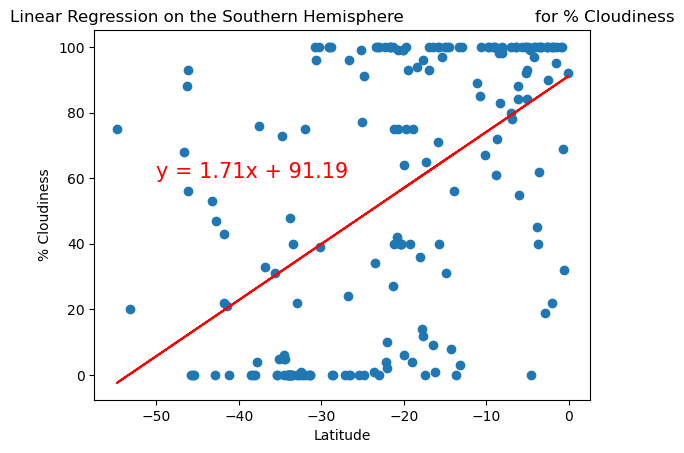

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))